# Trabajo Final de Data Science 2024-2025:

El trabajo consiste en analizar un dataset libremente elegido por cada grupo, que constará de 2 alumnos.

El objetivo es que cada grupo sea capaz de llevar a cabo un análisis riguroso de los datos, así como de exponer y visualizar las conclusiones alcanzadas de forma convincente.

El trabajo puede llevarse a cabo tanto en R como en Python. Se entregará un ZIP file script con el código, datos necesarios y un informe del trabajo.

Se valorará los siguientes apartados:

1. Correcta definición del estudio que se quiere llevar a cabo, estableciendo claramente las preguntas que se pretender analizar en el estudio.

2. Uso adecuado de las distintas técnicas analíticas explicada durante el curso, incluyendo estadística inferencial y contraste de hipótesis, PCA, modelos de regresión lineal, incluyendo regularización, modelos de regresión logística, selección de variables, métodos de clustering.

3. Uso adecuado de técnicas de procesamiento de datos y visualización explicadas durante el curso.

4. Estilo adecuado y profesional en el informe entregado. Puede ser tanto en inglés como en castellano.

5. Presentación oral de los resultados del trabajo.  

Se adjunta un ejemplo de trabajo realizado el curso anterior. No es un trabajo perfecto. Tiene algunos fallos, particularmente se echan en falta un mejor uso de contraste de hipótesis para sustanciar los resultados e hipótesis generadas. Sin embargo, sirve como ejemplo para ver lo que se pide.

Fecha de Entrega: 06/11/2024

Fecha de Presentaciones: 12/11/2024, 15:00

## Datos:
(Jaime)
(explicación del dataset: columnas, tipos de datos, tamaño, fuente de los datos(link)...)

## Metodología:

- Análisis del problema ¿Qué queremos?
- Visualización de los datos en crudo.
- Procesado de los datos.
- Representación de los datos y sus relaciones. (EDA)
- Contraste de hipotesis (Luis).
- Todo el tema de estadistica y machine learning.


# Anotaciones del trabajo:

tenemos 1320 filas y 20 columnas

* Columnas a borrar en el dataset:
    - User ID
    - Charging Start Time
    - Charging End Time



Preguntas:

- ¿Cuáles son las principales variables que influyen en el tiempo total de carga?


Gráficas sencillas:

- Picos de carga agrupados en momento de día y día: 7*4= 28 momentos
- Matriz de relaciones que influye más en la duración de la carga o en el coste. (solo datos numericos).

Preguntas sacadas de internet (Jaime):

* Análisis de comportamiento de carga:

¿Cuál es la variación del tiempo de carga en función de diferentes horas del día o días de la semana?
¿Existe una relación entre el tiempo de carga y la tarifa de energía en distintas estaciones o franjas horarias?
¿Se observan patrones estacionales en el uso de estaciones de carga (por ejemplo, diferencias entre invierno y verano)?

* Segmentación de usuarios y patrones de uso:

¿Existen diferentes perfiles de usuarios (según tiempo medio de carga, frecuencia de uso, etc.) y cómo varían sus comportamientos?
¿Qué diferencias existen en los patrones de carga entre usuarios particulares y comerciales, si el dataset contiene esta información?
¿Qué factores parecen influir más en la elección de una estación de carga específica?

* Predicción y optimización:

¿Qué variables tienen el mayor impacto en la duración del tiempo de carga y en la frecuencia de uso de las estaciones?
¿Es posible predecir las horas pico de uso en función de los datos históricos?
¿Qué características del punto de carga (como potencia, ubicación) predicen un mayor número de usuarios?

* Impacto en la infraestructura de carga:

¿Cuáles son los puntos de carga con mayor uso, y qué características tienen en común?
¿Cómo varía la demanda de carga según la proximidad a áreas urbanas o rurales?
¿Existen patrones de uso que sugieren la necesidad de ampliar la infraestructura en ciertas áreas?

* Sostenibilidad y Eficiencia Energética:

¿Cuánto tiempo, en promedio, permanecen los vehículos conectados después de estar completamente cargados?
¿Cuál es la tasa de eficiencia en el uso de las estaciones de carga? ¿Se producen períodos significativos de inactividad?
¿Cómo afecta el tiempo de conexión a la eficiencia de la infraestructura de carga en general?

* Tendencias de adopción de EV:

¿Se observa un crecimiento en la cantidad de sesiones de carga a lo largo del tiempo? ¿Es consistente en todas las estaciones?
¿Qué patrones emergentes indican un aumento en la adopción de vehículos eléctricos en ciertas áreas o tipos de usuarios?

Posibles Preguntas de Análisis (Luis)
* Patrones de Consumo y Eficiencia:
-¿Cuál es la relación entre el Estado de Carga al inicio y final y la Energía Consumida?
-¿Cómo varía el Costo de Carga en función del Ubicación de la Estación o el Tipo de Cargador?

* Factores que Afectan la Duración y Costo de la Carga:
¿Cómo influyen el Modelo de Vehículo, la Capacidad de Batería y la Edad del Vehículo en el Costo de Carga y el Tiempo de Carga?
¿Qué impacto tiene la Temperatura en la Duración de Carga y Eficiencia?

* Análisis de Uso del Cargador por Tipo de Usuario:
¿Qué diferencias existen entre los patrones de carga de los usuarios clasificados como Commuters frente a los Long-Distance Travelers?
¿Existe una tendencia en el Horario de Carga según el Tipo de Usuario?

* Análisis de Localización y Estaciones de Carga:
¿Cuáles son los lugares con mayor consumo de energía, y cómo varía el Tiempo de Carga entre distintas Ubicaciones?
¿Se identifican patrones de alta demanda según el Día de la Semana o la Hora del Día?


In [149]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt

raw_data = pd.read_csv('DatasetDS/ev_charging_patterns.csv')
# Llenar valores NaN con la mediana para columnas seleccionadas
for column in ['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Duration (hours)', 
               'Charging Rate (kW)', 'Charging Cost (USD)', 'State of Charge (Start %)', 
               'State of Charge (End %)', 'Distance Driven (since last charge) (km)', 
               'Temperature (°C)', 'Vehicle Age (years)']:
    raw_data[column].fillna(raw_data[column].median(), inplace=True)

# Redondear valores de Battery Capacity y Vehicle Age a 0 decimales
raw_data['Battery Capacity (kWh)'] = raw_data['Battery Capacity (kWh)'].round(0)
raw_data['Vehicle Age (years)'] = raw_data['Vehicle Age (years)'].round(0)

# Crear la columna 'Percentage of Charge'
#raw_data['Percentage of Charge'] = raw_data['State of Charge (End %)'] - raw_data['State of Charge (Start %)']

# Añadir nuevas características al dataset
raw_data['Charging Efficiency (kWh/h)'] = raw_data['Energy Consumed (kWh)'] / raw_data['Charging Duration (hours)']
raw_data['Energy per Charge %'] = raw_data['Energy Consumed (kWh)'] / (raw_data['State of Charge (End %)'] - raw_data['State of Charge (Start %)'])
raw_data['Distance per kWh'] = raw_data['Distance Driven (since last charge) (km)'] / raw_data['Energy Consumed (kWh)']
raw_data['Total Charge Gained'] = raw_data['State of Charge (End %)'] - raw_data['State of Charge (Start %)']
raw_data['Charger Efficiency'] = raw_data['Charging Rate (kW)'] / raw_data['Charging Duration (hours)']
raw_data['Charge Rate (%/h)'] = raw_data['Total Charge Gained'] / raw_data['Charging Duration (hours)']


# Manejo de divisiones por cero o valores infinitos
raw_data.replace([np.inf, -np.inf], np.nan, inplace=True)
raw_data.fillna(0, inplace=True)  # Reemplaza NaN o infinito con 0 para simplificar

# Ajuste de consumo de energía basado en temperatura, asumiendo 20°C como temperatura "promedio" cómoda para los vehículos eléctricos
average_temperature = 20
raw_data['Temperature Adjusted Consumption'] = raw_data['Energy Consumed (kWh)'] * \
                                                 (1 + abs(raw_data['Temperature (°C)'] - average_temperature) / average_temperature)

# Verificar nuevas características
raw_data.head()

# Eliminar columnas irrelevantes para análisis
data_cleaned = raw_data.drop(columns=['User ID', 'Charging Station ID', 'Charging Start Time', 
                                      'Charging End Time', 'State of Charge (Start %)', 'State of Charge (End %)', 'User Type', 'Day of Week', 'Time of Day'])

# Cambiar el nombre de una columna para mayor claridad
data_cleaned.rename(columns={'Distance Driven (since last charge) (km)': 'Distance Driven(km)'}, inplace=True)

# Verificación para comprobar que no hay NaN values
print(data_cleaned.isna().sum())

# Verifica los cambios en las columnas
#print(data_cleaned[['Battery Capacity (kWh)', 'Vehicle Age (years)']].head())


# Filtrar filas donde 'Total Charge Gained' esté entre 0 y 100
print(f"Valores eliminados por la condición de Total Charge Gained entre 0 y 100 : {len(data_cleaned[~(raw_data['Total Charge Gained'] >= 0) & (raw_data['Total Charge Gained'] <= 100)])} filas")
data_cleaned = data_cleaned[(raw_data['Total Charge Gained'] >= 0) & (raw_data['Total Charge Gained'] <= 100)]

print(f"Valores eliminados por la condición de Charge Rate (% per hour)' <= 160 : {len(data_cleaned[~(raw_data['Charge Rate (%/h)'] <= 160)])} filas")
data_cleaned = data_cleaned[raw_data['Charge Rate (%/h)'] <= 160]

print(f"Valores eliminados por la condición de Charging Efficiency (kWh/h) >= 1 : {len(data_cleaned[~(raw_data['Charging Efficiency (kWh/h)'] > 1)])} filas")
data_cleaned = data_cleaned[raw_data['Charging Efficiency (kWh/h)'] >= 1]

print(f"Valores eliminados por la condición de Total battery capacity entre 30 y 100 : {len(data_cleaned[~((raw_data['Battery Capacity (kWh)'] >= 30) & (raw_data['Battery Capacity (kWh)'] <= 100))])} filas")
data_cleaned = data_cleaned[(raw_data['Battery Capacity (kWh)'] >= 30) & (raw_data['Battery Capacity (kWh)'] <= 100)]

# Temperaturas: 
ciudades_temp_max = {
    "Houston": 24,
    "Los Angeles": 27,
    "New York": 20,
    "San Francisco": 27,
    "Chicago": 22
}

# Iterar sobre cada ciudad y aplicar el filtro correspondiente
for ciudad, temp_max in ciudades_temp_max.items():
    # Contar las filas eliminadas antes de aplicar el filtro
    filas_eliminadas = len(data_cleaned[~((data_cleaned['Charging Station Location'] != ciudad) | ((data_cleaned['Charging Station Location'] == ciudad)  & (raw_data['Temperature (°C)'] <= temp_max)))])
    print(f"Valores eliminados por la condición en {ciudad} con Temp <= {temp_max}°C: {filas_eliminadas} filas")
    # Aplicar el filtro
    data_cleaned = data_cleaned[((data_cleaned['Charging Station Location'] != ciudad) | ((data_cleaned['Charging Station Location'] == ciudad) & (raw_data['Temperature (°C)'] <= temp_max)))]

# Mostrar el DataFrame resultante
data_cleaned


Vehicle Model                       0
Battery Capacity (kWh)              0
Charging Station Location           0
Energy Consumed (kWh)               0
Charging Duration (hours)           0
Charging Rate (kW)                  0
Charging Cost (USD)                 0
Distance Driven(km)                 0
Temperature (°C)                    0
Vehicle Age (years)                 0
Charger Type                        0
Charging Efficiency (kWh/h)         0
Energy per Charge %                 0
Distance per kWh                    0
Total Charge Gained                 0
Charger Efficiency                  0
Charge Rate (%/h)                   0
Temperature Adjusted Consumption    0
dtype: int64
Valores eliminados por la condición de Total Charge Gained entre 0 y 100 : 268 filas
Valores eliminados por la condición de Charge Rate (% per hour)' <= 160 : 3 filas
Valores eliminados por la condición de Charging Efficiency (kWh/h) >= 1 : 3 filas
Valores eliminados por la condición de Total battery c

C:\Users\luis_\AppData\Local\Temp\ipykernel_4284\629406791.py:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Valores eliminados por la condición de Charge Rate (% per hour)' <= 160 : {len(data_cleaned[~(raw_data['Charge Rate (%/h)'] <= 160)])} filas")
C:\Users\luis_\AppData\Local\Temp\ipykernel_4284\629406791.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned = data_cleaned[raw_data['Charge Rate (%/h)'] <= 160]
C:\Users\luis_\AppData\Local\Temp\ipykernel_4284\629406791.py:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(f"Valores eliminados por la condición de Charging Efficiency (kWh/h) >= 1 : {len(data_cleaned[~(raw_data['Charging Efficiency (kWh/h)'] > 1)])} filas")
C:\Users\luis_\AppData\Local\Temp\ipykernel_4284\629406791.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned = data_cleaned[raw_data['Charging Ef

,Vehicle Model,Battery Capacity (kWh),Charging Station Location,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Distance Driven(km),Temperature (°C),Vehicle Age (years),Charger Type,Charging Efficiency (kWh/h),Energy per Charge %,Distance per kWh,Total Charge Gained,Charger Efficiency,Charge Rate (%/h),Temperature Adjusted Consumption
1,Hyundai Kona,100.0,San Francisco,12.339275,3.133652,30.677735,21.128448,112.112804,14.311026,3.0,Level 1,3.937666,0.165520,9.085850,74.548566,9.789771,23.789676,15.849166
2,Chevy Bolt,75.0,San Francisco,19.128876,2.452653,27.513593,35.667270,71.799253,21.002002,2.0,Level 2,7.799260,0.303330,3.753449,63.063011,11.217892,25.712165,20.087234
4,Hyundai Kona,50.0,Los Angeles,19.629104,2.019765,10.215712,10.161471,203.661847,-7.834199,1.0,Level 1,9.718509,2.069525,10.375504,9.484836,5.057871,4.696010,46.947124
7,Chevy Bolt,75.0,Los Angeles,51.467617,2.655396,26.702908,9.796821,116.543166,-4.417460,0.0,Level 2,19.382272,6.785347,2.264398,7.585112,10.056091,2.856490,114.303040
8,Chevy Bolt,62.0,Los Angeles,43.592372,1.724204,14.294923,32.465005,208.259742,22.516706,4.0,Level 1,25.282613,0.732704,4.777435,59.495221,8.290740,34.505914,49.077832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,BMW i3,75.0,San Francisco,54.825113,0.557213,45.863832,22.930048,69.728623,23.601370,5.0,Level 1,98.391604,2.150850,1.271837,25.489975,82.309287,45.745451,64.697389
1308,BMW i3,75.0,Los Angeles,6.432324,0.930239,9.025939,16.431101,209.983564,21.696951,2.0,DC Fast Charger,6.914698,3.587888,32.645053,1.792788,9.702814,1.927233,6.978091
1311,Hyundai Kona,50.0,Houston,74.276701,2.849151,25.073544,38.194006,194.793544,7.731967,3.0,Level 2,26.069762,8.190826,2.622539,9.068280,8.800355,3.182800,119.838150
1314,Hyundai Kona,50.0,New York,43.251453,2.501809,63.216118,36.356930,220.281863,1.630850,5.0,Level 1,17.288073,13.996224,5.093051,3.090223,25.268166,1.235196,82.976076


Vamos a realizar un ejemplo de test ANOVA para comparar el costo promedio de carga entre distintas ubicaciones de estación. Esto nos ayudará a determinar si hay diferencias significativas en el costo de carga dependiendo del lugar.

In [150]:
from scipy.stats import f_oneway

# Filtrar datos necesarios para el ANOVA
# Agrupar los datos de "Charging Cost (USD)" por "Charging Station Location"
anova_data = data_cleaned[['Charging Station Location', 'Charging Cost (USD)']].dropna()

# Extraer los costos por cada ubicación única
station_groups = [anova_data['Charging Cost (USD)'][anova_data['Charging Station Location'] == location] 
                  for location in anova_data['Charging Station Location'].unique()]

# Realizar el test ANOVA
anova_result = f_oneway(*station_groups)
anova_result


F_onewayResult(statistic=0.3859208050504215, pvalue=0.8187829885870216)

Un valor bajo de F, como 1.007, indica que la variabilidad entre los grupos es pequeña en comparación con la variabilidad dentro de cada grupo.

Esto significa que las diferencias en el costo de carga entre las distintas ubicaciones son pequeñas y no mayores a la variabilidad dentro de cada ubicación.

Vamos a realizar una prueba t para comparar el tiempo de carga promedio entre dos tipos de cargadores

In [151]:
data_cleaned['Charger Type'].unique()

array(['Level 1', 'Level 2', 'DC Fast Charger'], dtype=object)

In [152]:
from scipy.stats import f_oneway

# Agrupar los datos de tiempos de carga por tipo de cargador
dc_fast = data_cleaned[data_cleaned['Charger Type'] == 'DC Fast Charger']['Charging Duration (hours)'].dropna()
level_1 = data_cleaned[data_cleaned['Charger Type'] == 'Level 1']['Charging Duration (hours)'].dropna()
level_2 = data_cleaned[data_cleaned['Charger Type'] == 'Level 2']['Charging Duration (hours)'].dropna()

# Realizar el test ANOVA
anova_result = f_oneway(dc_fast, level_1, level_2)
print("Estadístico F:", anova_result.statistic)
print("Valor p:", anova_result.pvalue)

Estadístico F: 0.4981116205115907
Valor p: 0.6079012876815124


Un valor de F tan bajo indica que la variabilidad en el tiempo de carga entre los distintos tipos de cargador es muy pequeña en comparación con la variabilidad dentro de cada tipo.

Un valor p de 0.803, que es mucho mayor que el umbral de 0.05, significa que no existe evidencia estadísticamente significativa para rechazar la hipótesis nula. En este caso, la hipótesis nula supone que no hay diferencias significativas en el tiempo de carga promedio entre los tres tipos de cargadores.

Contraste de hipótesis basado en la relación entre la temperatura y el consumo de energía utilizando un análisis de correlación. Esto nos permitirá ver si existe una correlación significativa entre la Temperatura y la Energía Consumida (kWh)

In [153]:
from scipy.stats import pearsonr

correlation_data = data_cleaned[['Temperature (°C)', 'Energy Consumed (kWh)']].dropna()

correlation_result, p_value = pearsonr(correlation_data['Temperature (°C)'], correlation_data['Energy Consumed (kWh)'])
print("Correlación de Pearson:", correlation_result)
print("Valor p:", p_value)


Correlación de Pearson: 0.03201720383252432
Valor p: 0.40625471177184536


El valor de correlación de Pearson es muy cercano a 0, lo que indica que no hay una correlación lineal significativa entre la temperatura y el consumo de energía. Un valor negativo muy bajo sugiere una relación casi nula.

El valor p es bastante alto (mayor que el nivel de significancia común de 0.05), lo que significa que no podemos rechazar la hipótesis nula. En este caso, la hipótesis nula establece que no existe una correlación significativa entre la temperatura y el consumo de energía.

In [154]:
print(data_cleaned.columns)

Index(['Vehicle Model', 'Battery Capacity (kWh)', 'Charging Station Location',
       'Energy Consumed (kWh)', 'Charging Duration (hours)',
       'Charging Rate (kW)', 'Charging Cost (USD)', 'Distance Driven(km)',
       'Temperature (°C)', 'Vehicle Age (years)', 'Charger Type',
       'Charging Efficiency (kWh/h)', 'Energy per Charge %',
       'Distance per kWh', 'Total Charge Gained', 'Charger Efficiency',
       'Charge Rate (%/h)', 'Temperature Adjusted Consumption'],
      dtype='object')


In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definir un umbral para clasificar el tipo de usuario basado en patrones de carga
# Este umbral se puede ajustar según el análisis exploratorio
data_cleaned['User Type'] = data_cleaned.apply(
    lambda x: 1 if x['Charging Duration (hours)'] > 2 and x['Energy Consumed (kWh)'] > 30 else 0,
    axis=1
)

# Definir las variables predictoras y la nueva variable objetivo
X = data_cleaned[['Battery Capacity (kWh)', 'Charging Duration (hours)', 'Charging Rate (kW)', 'Temperature (°C)']]  # Ajusta según tus columnas
y = data_cleaned['User Type']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

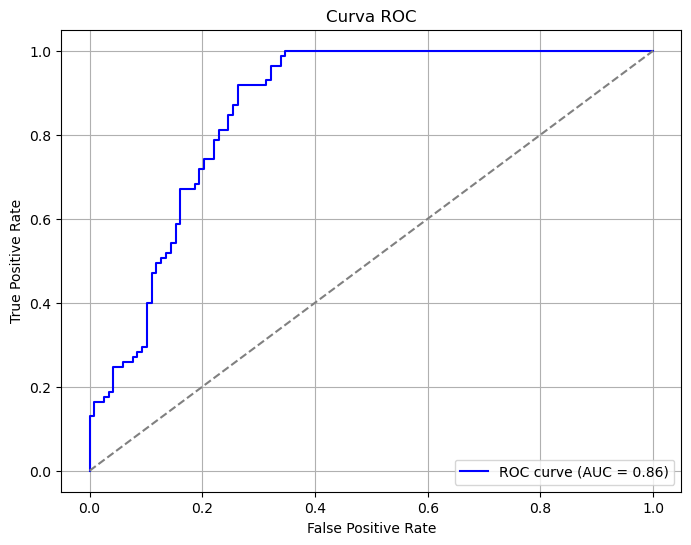

AUC: 0.8608175473579263


In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción para la clase positiva
y_prob = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el AUC
auc_score = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia (clasificador aleatorio)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("AUC:", auc_score)


In [157]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Ajustar el umbral de decisión (por defecto es 0.5)
threshold = 0.5
y_pred_threshold = (y_prob >= threshold).astype(int)

# Calcular las métricas de clasificación con el umbral ajustado
precision = precision_score(y_test, y_pred_threshold)
recall = recall_score(y_test, y_pred_threshold)
f1 = f1_score(y_test, y_pred_threshold)
accuracy = accuracy_score(y_test, y_pred_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_threshold)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Exactitud:", accuracy)

print("Matriz de Confusión:\n", conf_matrix)

# También puedes obtener el reporte de clasificación completo
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_threshold))


Precisión: 0.75
Recall: 0.6705882352941176
F1-Score: 0.7080745341614908
Exactitud: 0.7684729064039408
Matriz de Confusión:
 [[99 19]
 [28 57]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       118
           1       0.75      0.67      0.71        85

    accuracy                           0.77       203
   macro avg       0.76      0.75      0.76       203
weighted avg       0.77      0.77      0.77       203



c:\Users\luis_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luis_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\luis_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luis_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

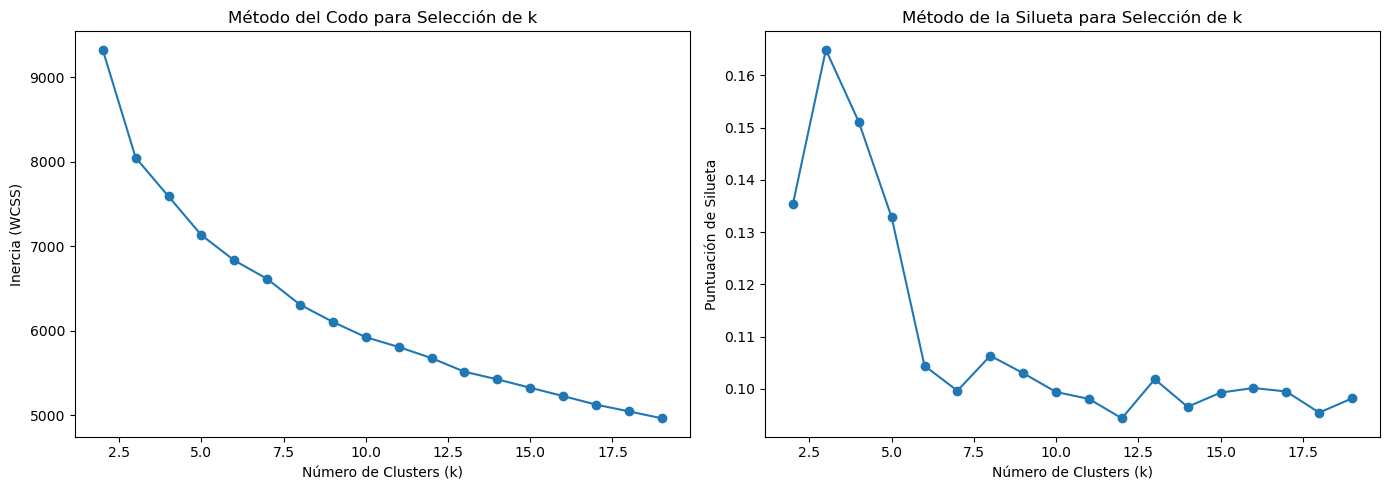

In [158]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Seleccionar variables numéricas para clustering
data_for_clustering = data_cleaned.select_dtypes(include=[float, int])

# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Inicializar listas para almacenar los resultados
wcss = []  # Inercia dentro de los clusters para el método del codo
silhouette_scores = []  # Puntuación de silueta para cada k

# Probar diferentes valores de k (número de clusters)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
    
    # Calcular el coeficiente de silueta para el número de clusters actual
    score = silhouette_score(data_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el método del codo
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 20), wcss, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (WCSS)")
plt.title("Método del Codo para Selección de k")

# Graficar el método de la silueta
plt.subplot(1, 2, 2)
plt.plot(range(2, 20), silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Puntuación de Silueta")
plt.title("Método de la Silueta para Selección de k")

plt.tight_layout()
plt.show()


c:\Users\luis_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\luis_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


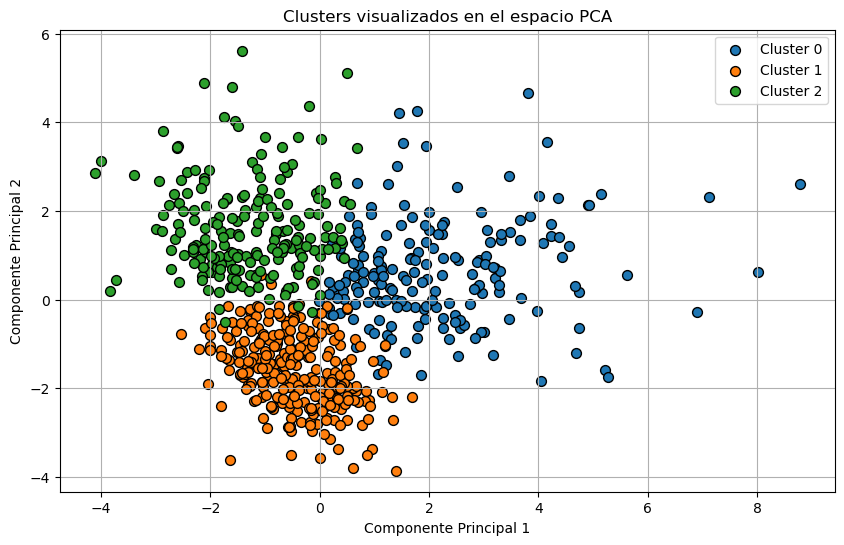

In [159]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Crear un modelo K-Means con el número de clusters óptimo (ajusta k según el análisis anterior)
k = 3  # Ajusta este valor según el método del codo o la silueta
kmeans = KMeans(n_clusters=k, random_state=42)
data_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

# Graficar los datos en el espacio PCA con colores contrastantes
plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab10", k)  # Paleta tab10 de colores contrastantes

# Plot con colores asignados por clusters
for cluster in range(k):
    plt.scatter(data_pca[data_cleaned['Cluster'] == cluster, 0], 
                data_pca[data_cleaned['Cluster'] == cluster, 1], 
                label=f'Cluster {cluster}', 
                color=palette[cluster], 
                edgecolor='k', 
                s=50)

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters visualizados en el espacio PCA")
plt.legend()
plt.grid(True)
plt.show()


In [160]:
data_for_clustering2 = data_cleaned.select_dtypes(include=[float, int])
# Calcular las medias de las variables en cada cluster
cluster_summary = data_for_clustering2.groupby('Cluster').mean()
#print(cluster_summary)

cluster_summary


,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Distance Driven(km),Temperature (°C),Vehicle Age (years),Charging Efficiency (kWh/h),Energy per Charge %,Distance per kWh,Total Charge Gained,Charger Efficiency,Charge Rate (%/h),Temperature Adjusted Consumption,User Type
Cluster,,,,,,,,,,,,,,,,
0,76.925926,52.520994,1.146950,26.851799,22.750943,129.684076,7.309386,3.878307,53.305060,4.347009,2.772295,35.631288,27.124753,36.298153,86.583952,0.000000
1,74.300353,55.874232,3.002978,24.909399,22.931752,162.168748,6.451814,3.607774,19.424785,3.665451,3.137339,37.445339,8.673544,12.912636,94.492683,0.992933
2,73.280788,18.978999,2.387926,26.082946,21.274247,170.822538,7.271597,3.600985,9.441121,1.559380,11.659691,33.190092,13.045189,16.582046,31.442962,0.004926


### Análisis y Asignación de Etiquetas para los Clusters

Con base en el análisis estadístico de cada cluster en el dataset `cluster_summary`, se proponen las siguientes etiquetas descriptivas:

1. **Cluster 0**:
   - **Etiqueta**: "Carga rápida y eficiente"
   - **Características**: 
     - Alta eficiencia de carga (53.31 kWh/h).
     - Mayor capacidad de batería.
     - Menor duración de carga (1.15 horas en promedio).
   - **Interpretación**: Este grupo parece representar vehículos con cargas rápidas y eficientes, probablemente en situaciones de carga parcial o vehículos con alta tasa de consumo de energía ajustada por temperatura.

2. **Cluster 1**:
   - **Etiqueta**: "Cargas prolongadas y usuarios frecuentes"
   - **Características**:
     - Mayor duración de carga (3 horas en promedio).
     - Alto costo de carga.
     - Eficiencia de carga media.
     - `User Type` cercano a 1, lo cual podría indicar usuarios regulares o frecuentes.
   - **Interpretación**: Este cluster agrupa usuarios que probablemente realicen cargas completas y frecuentes.

3. **Cluster 2**:
   - **Etiqueta**: "Alta eficiencia de conducción y carga moderada"
   - **Características**:
     - Alta distancia por kWh (11.66 km/kWh).
     - Menor consumo ajustado por temperatura.
     - Cargas de duración media (2.39 horas).
   - **Interpretación**: Este grupo probablemente representa vehículos que optimizan su consumo en cada carga, enfocándose en eficiencia energética durante el manejo.

